In [22]:
!pip install yfinance==0.2.43

  Obtaining dependency information for yfinance==0.2.43 from https://files.pythonhosted.org/packages/39/29/89572cb0c65b07a1c4e5cd53eb0a0f947f2ece53fef6ed7da90cfab7d2a9/yfinance-0.2.43-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/84.6 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/84.6 kB ? eta -:--:--
   ---------------------------------------- 84.6/84.6 kB 952.7 kB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.38
    Uninstalling yfinance-0.2.38:
      Successfully uninstalled yfinance-0.2.38


In [29]:
import pandas as pd
import yfinance as yf  # we import the library and rename it to yf
import matplotlib.pyplot as plt
 
ticker = yf.Ticker("AAPL")
all_call=pd.DataFrame()
all_put=pd.DataFrame()
 
expirations = ticker.options
print(expirations)

c = ticker.option_chain(expirations[5]).calls 
print(c.head())
 
fig = plt.figure(figsize=(10, 6))  
plt.plot(c.strike,c.lastPrice, label=expirations[5])
 
all_calls=pd.DataFrame()
for expiration in expirations[6:-2]:
    c = ticker.option_chain(expiration).calls
    plt.plot(c.strike,c.lastPrice, label=expiration)
    c["expiration"]=expiration
    all_calls = pd.concat([all_calls, c], axis=0)
 
all_calls['expiration'] = pd.to_datetime(all_calls['expiration'])
all_calls['days_to_expiry'] = (all_calls['expiration'] - pd.Timestamp.now()).dt.days
all_calls['midPrice'] = (all_calls['ask']+all_calls['bid'])/2
 
# Adding legend, x-axis and y-axis labels, and a figure title
plt.legend(loc='upper right')
plt.xlabel('Strike Price')
plt.ylabel('Last Price')
plt.title('Option Prices for AAPL')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

()


IndexError: tuple index out of range

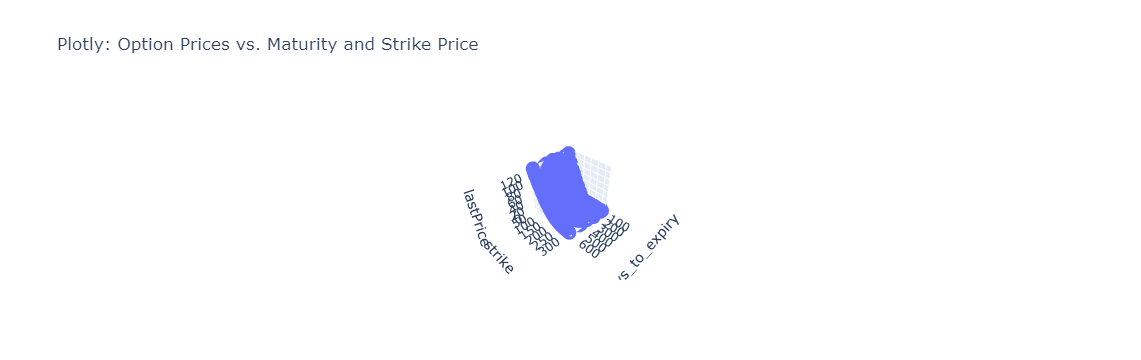

In [4]:
import plotly.express as px
fig = px.scatter_3d(all_calls, x='days_to_expiry', y='strike', z='lastPrice',
                    title='Plotly: Option Prices vs. Maturity and Strike Price')
fig.show()

In [2]:
import plotly.graph_objects as go
 
# Pivot the data to get a grid suitable for a surface plot
pivot_table = all_calls.pivot(index='days_to_expiry', columns='strike', values='lastPrice')
 
fig = go.Figure(data=[go.Surface(z=pivot_table.values, x=pivot_table.columns, y=pivot_table.index)])
fig.update_layout(title='Plotly: Option Prices Surface Plot', scene=dict(
                  xaxis_title='Strike Price',
                  yaxis_title='Days to Expiry',
                  zaxis_title='Option Price'))
fig.show()

NameError: name 'all_calls' is not defined